#Airline on-time performance data analysis and prediction<font color=black size=8 face=雅黑>

In [1]:
!pip install pyecharts

You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [2]:
# Install the clubear library.
!pip install clubear

You should consider upgrading via the 'D:\Anaconda\python.exe -m pip install --upgrade pip' command.


In [3]:
import datetime,warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
import matplotlib.ticker as mtick
import networkx as nx
import clubear as cb
import os
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

Welcome to clubear! A subsample-based massive data analysis and research toolkit ( 2020-05-27 15:08:20 ).


# Import the research dataframe <font color=black size=5 face=雅黑>

In [4]:
data2005 = pd.read_csv('E:/UOL_semester_2/programming_of_data_science/Individual_Assessment/2004_2006Datasource/2005.csv')
data2005.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


In [5]:
data2006 = pd.read_csv('E:/UOL_semester_2/programming_of_data_science/Individual_Assessment/2004_2006Datasource/2006.csv')
data2006.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


# combine dataset 2005 and 2006<font color=black size=5 face=雅黑>

In [6]:
combined_df = pd.concat([data2005,data2006])

In [7]:
combined_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0


In [8]:
combined_df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,NaN,0,0,0,0,0,0
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,NaN,0,30,0,32,0,0
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,NaN,0,0,0,0,0,0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,NaN,0,0,0,0,0,0
7141921,2006,12,29,5,2042.0,2045,2213.0,2235,DL,1678,...,5,15,0,NaN,0,0,0,0,0,0


In [9]:
# combined_df['DATE',] = pd.to_datetime(combined_df[['Year','Month', 'DayofMonth']])？

In [10]:
combined_df.shape

(14282518, 29)

#### Use 'concat' to combined dataframe 2004 and 2005, the data shape indecate there are 14269866 rows and 29 columns.

# Data Wrangling<font color=black size=5 face=雅黑>

obtain a concise summary and check the datatype of the dataframe

In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14282518 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay     

## Drop duplicate <font color=black size=5 face=雅黑>

In [12]:
#Find the number of duplicated rows.
print("The number of duplicated rows is {0}.".format(combined_df.duplicated().sum())) 

The number of duplicated rows is 18.


In [13]:
combined_df.drop_duplicates(inplace=True)

In [14]:
print('The number of duplicated rows is {0}.'.format(combined_df.duplicated().sum()))

The number of duplicated rows is 0.


The duplicates are dropped and there is no more duplicate in the research dataframe

## Handle the Null Value <font color=black size=5 face=雅黑>

In [15]:
combined_df.isnull().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                255664
CRSDepTime                  0
ArrTime                285877
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime      285877
CRSElapsedTime              4
AirTime                285877
ArrDelay               285877
DepDelay               255664
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14026835
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [16]:
# Replace the null value with 0.
cleaned_combined_flight_df=combined_df.fillna(0)

In [17]:
#check null values again to ensure no more null value.
cleaned_combined_flight_df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Null values have been successfully replaced with 0.

## Data type conversion

In [18]:
# Multi-column data type conversion
cleaned_combined_flight_df[['DepTime','ArrTime','ActualElapsedTime','AirTime','ArrDelay','DepDelay']] = cleaned_combined_flight_df[['DepTime','ArrTime','ActualElapsedTime','AirTime','ArrDelay','DepDelay']].astype(int)

In [19]:
cleaned_combined_flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14282500 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            int32  
 5   CRSDepTime         int64  
 6   ArrTime            int32  
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  int32  
 12  CRSElapsedTime     float64
 13  AirTime            int32  
 14  ArrDelay           int32  
 15  DepDelay           int32  
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay     

## Deal with the outlier 

In [20]:
# Create Time_Distance_cols which are 
Time_Distance_cols = ['DepTime','ArrTime','ActualElapsedTime','CRSDepTime','CRSArrTime','CRSElapsedTime','Distance']
outlier = (cleaned_combined_flight_df[Time_Distance_cols] < 0 ).any(axis=1)
if outlier.any():
    # Do have outliers
    print('The Number of outlier：')
    print(cleaned_combined_flight_df[outlier])
    # Delete the row where the outlier is located
    cleaned_Time_combined_flight_df = cleaned_combined_flight_df[~outlier]
    print('Rows with outliers removed, remaining data:')
    print(cleaned_Time_combined_flight_df)
else:
    # No outliers
    print('There are no outliers in the time column.')

The Number of outlier：
         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
204345   2005      1           1          6       23        2230     2400   
216462   2005      1          10          1     2359        2220     2400   
230160   2005      1          20          4     2400        2120     2254   
416071   2005      1           6          4     1008         729        0   
1571077  2005      3          19          6      718         723        0   
2306715  2005      4           2          6      116        2030      211   
2785799  2005      5          13          5     2129        2044        0   
3300843  2005      6           8          3     1227        1227     1156   
3386729  2005      6          28          2     1912        1909        0   
4017971  2005      7          21          4     1550        1508        0   
4652719  2005      8           4          4     1032        1026        0   
5924723  2005     10          11          2     1030 

Rows with outliers removed, remaining data:
         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0        2005      1          28          5     1603        1605     1741   
1        2005      1          29          6     1559        1605     1736   
2        2005      1          30          7     1603        1610     1741   
3        2005      1          31          1     1556        1605     1726   
4        2005      1           2          7     1934        1900     2235   
...       ...    ...         ...        ...      ...         ...      ...   
7141917  2006     12          29          5     1246        1249     1452   
7141918  2006     12          29          5     1225        1155     2033   
7141919  2006     12          29          5     2118        2115     2254   
7141920  2006     12          29          5     2122        2127     2209   
7141921  2006     12          29          5     2042        2045     2213   

         CRSArrTime UniqueCarri

In [21]:
cleaned_combined_flight_df[outlier].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
204345,2005,1,1,6,23,2230,2400,2347,OO,6424,...,0,17,0,0,0,0,0,0,0,0
216462,2005,1,10,1,2359,2220,2400,39,OO,6528,...,0,14,0,0,0,0,0,0,0,0
230160,2005,1,20,4,2400,2120,2254,2215,OO,6830,...,5,1339,0,0,0,0,0,0,0,39
416071,2005,1,6,4,1008,729,0,726,MQ,4331,...,0,19,0,0,1,0,0,0,0,0
1571077,2005,3,19,6,718,723,0,720,MQ,4331,...,0,14,0,0,1,0,0,0,0,0


## Rename DayofMonth to the day 

In [22]:
cleaned_Time_combined_flight_df = cleaned_Time_combined_flight_df.rename(columns={'DayofMonth':'Day'})

## Datetime to merge Year, Month and Day

In [23]:
# Datetime to merge Year, Month and Day
cleaned_Time_combined_flight_df['DATE'] = pd.to_datetime(cleaned_Time_combined_flight_df[['Year','Month', 'Day']])

In [24]:
# Check whether the datatime is available 
cleaned_Time_combined_flight_df.head()

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DATE
0,2005,1,28,5,1603,1605,1741,1759,UA,541,...,23,0,0,0,0,0,0,0,0,2005-01-28
1,2005,1,29,6,1559,1605,1736,1759,UA,541,...,15,0,0,0,0,0,0,0,0,2005-01-29
2,2005,1,30,7,1603,1610,1741,1805,UA,541,...,18,0,0,0,0,0,0,0,0,2005-01-30
3,2005,1,31,1,1556,1605,1726,1759,UA,541,...,10,0,0,0,0,0,0,0,0,2005-01-31
4,2005,1,2,7,1934,1900,2235,2232,UA,542,...,10,0,0,0,0,0,0,0,0,2005-01-02


Merge Year,Month and day, the Date information is combined as the end column of the dataframe

## Rename the Airline Codes

In [25]:
# Rename the airline codes
cleaned_Time_combined_flight_df['UniqueCarrier'].replace({
    'UA':'United Airlines',
    'US':'United States Airways',
    'WN':'Southwest Airlines',
    'NW':'Northwest Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'XE':'Expressjet Airlines',
    'TZ':'Air Tazania Airlines',
    'DL':'Delta Airlines',
    'EV':'Atlantic Southeast Airlines',
    'FL':'Florida Airlines',
    'HA':'Hawaiian Airlines',
    'HP':'America West Airlines',
    'MQ':'Envoy Airlines',
    'AA':'American Airlines',
    'AS':'Alaska Airlines',
    'B6':'JetBlue Airways',
    'CO':'Continental Airlines',
    'DH':'Indepedence Airlines',
    'F9':'Frontier Airlines'
},inplace = True)

In [26]:
# Define df_Question
df_Question = cleaned_Time_combined_flight_df

## Datetime conversion

In [27]:
# Create a new column called 24 hourstime in order to convert the Arrtime column to 24-hour clock format for a better view. 
df_Question.loc[df_Question['DepTime'] >= 0,'24HoursTime'] = '00:00'
df_Question.loc[df_Question['DepTime'] >= 100, '24HoursTime'] = '01:00'
df_Question.loc[df_Question['DepTime'] >= 200,'24HoursTime'] = '02:00'
df_Question.loc[df_Question['DepTime'] >= 300, '24HoursTime'] = '03:00'
df_Question.loc[df_Question['DepTime'] >= 400 , '24HoursTime'] = "04:00"
df_Question.loc[df_Question['DepTime'] >= 500 , '24HoursTime'] = "05:00"
df_Question.loc[df_Question['DepTime'] >= 600 , '24HoursTime'] = "06:00"
df_Question.loc[df_Question['DepTime'] >= 800 , '24HoursTime'] = "08:00"
df_Question.loc[df_Question['DepTime'] >= 900 , '24HoursTime'] = "09:00"
df_Question.loc[df_Question['DepTime'] >= 1000 , '24HoursTime'] = "10:00"
df_Question.loc[df_Question['DepTime'] >= 1100 , '24HoursTime'] = "11:00"
df_Question.loc[df_Question['DepTime'] >= 1200 , '24HoursTime'] = "12:00"
df_Question.loc[df_Question['DepTime'] >= 1300 , '24HoursTime'] = "13:00"
df_Question.loc[df_Question['DepTime'] >= 1400 , '24HoursTime'] = "14:00"
df_Question.loc[df_Question['DepTime'] >= 1500 , '24HoursTime'] = "15:00"
df_Question.loc[df_Question['DepTime'] >= 1600 , '24HoursTime'] = "16:00"
df_Question.loc[df_Question['DepTime'] >= 1700 , '24HoursTime'] = "17:00"
df_Question.loc[df_Question['DepTime'] >= 1800 , '24HoursTime'] = "18:00"
df_Question.loc[df_Question['DepTime'] >= 1900 , '24HoursTime'] = "19:00"
df_Question.loc[df_Question['DepTime'] >= 2000 , '24HoursTime'] = "20:00"
df_Question.loc[df_Question['DepTime'] >= 2100 , '24HoursTime'] = "21:00"
df_Question.loc[df_Question['DepTime'] >= 2200 , '24HoursTime'] = "22:00"
df_Question.loc[df_Question['DepTime'] >= 2300 , '24HoursTime'] = "23:00"
df_Question.loc[df_Question['DepTime'] >= 2400 , '24HoursTime'] = "24:00"

In [28]:
# Show first five row of df_Question
df_Question[:5]

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DATE,24HoursTime
0,2005,1,28,5,1603,1605,1741,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-28,16:00
1,2005,1,29,6,1559,1605,1736,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-29,15:00
2,2005,1,30,7,1603,1610,1741,1805,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-30,16:00
3,2005,1,31,1,1556,1605,1726,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-31,15:00
4,2005,1,2,7,1934,1900,2235,2232,United Airlines,542,...,0,0,0,0,0,0,0,0,2005-01-02,19:00


The basic data wrangling has been done.We will use df_Question in the following problem solution !

# Exploratory Data Analysis

## Question 1: When is the best time of day, day of the week, and time of year to fly to minimise delays?

#### Problem explanation : Determine the best fly time that minimise delays

In [33]:
# Define df_Q1
df_Q1 = df_Question
df_Q1.head()

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DATE,24HoursTime
0,2005,1,28,5,1603,1605,1741,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-28,16:00
1,2005,1,29,6,1559,1605,1736,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-29,15:00
2,2005,1,30,7,1603,1610,1741,1805,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-30,16:00
3,2005,1,31,1,1556,1605,1726,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-31,15:00
4,2005,1,2,7,1934,1900,2235,2232,United Airlines,542,...,0,0,0,0,0,0,0,0,2005-01-02,19:00


Find the best time of the day to minimise delays

In [34]:
# v_t_r : variables to move 
v_t_r = [                 "FlightNum",
                "Distance", 
                "Cancelled",
                "Diverted",
                "ActualElapsedTime",
                "CRSElapsedTime",
                "TaxiIn",
                "TaxiOut"]

# Delete the unnecessary columns for the question.check whether there is "Unnamed: 0"
df_Q1 = df_Q1.drop(v_t_r, axis = 1)
df_Q1.head()

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,...,Origin,Dest,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DATE,24HoursTime
0,2005,1,28,5,1603,1605,1741,1759,United Airlines,N935UA,...,BOS,ORD,0,0,0,0,0,0,2005-01-28,16:00
1,2005,1,29,6,1559,1605,1736,1759,United Airlines,N941UA,...,BOS,ORD,0,0,0,0,0,0,2005-01-29,15:00
2,2005,1,30,7,1603,1610,1741,1805,United Airlines,N342UA,...,BOS,ORD,0,0,0,0,0,0,2005-01-30,16:00
3,2005,1,31,1,1556,1605,1726,1759,United Airlines,N326UA,...,BOS,ORD,0,0,0,0,0,0,2005-01-31,15:00
4,2005,1,2,7,1934,1900,2235,2232,United Airlines,N902UA,...,ORD,BOS,0,0,0,0,0,0,2005-01-02,19:00


In [35]:
# Show the accumulated amount of time that flights were delayed during 24 hour of a day.
best_time_of_day = df_Q1.groupby("24HoursTime")["DepDelay"].mean()
print(best_time_of_day)

24HoursTime
00:00      7.901516
01:00     74.284706
02:00     85.028914
03:00    107.896705
04:00      3.761596
05:00     -3.697065
06:00     -0.506094
08:00      1.901244
09:00      3.770530
10:00      4.874425
11:00      6.003330
12:00      6.692587
13:00      7.802027
14:00      8.984409
15:00     10.258041
16:00     11.341112
17:00     12.057529
18:00     14.387541
19:00     16.943987
20:00     20.691794
21:00     24.657900
22:00     34.587523
23:00     45.758550
24:00    103.371009
Name: DepDelay, dtype: float64


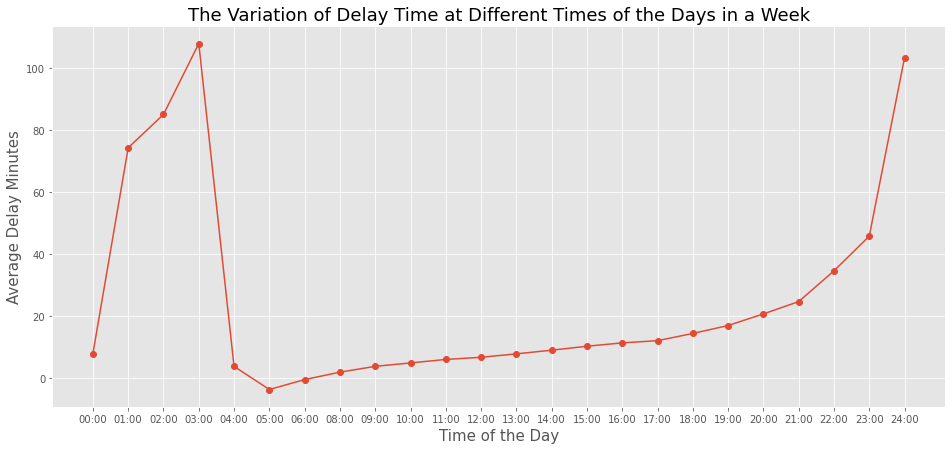

In [36]:
plt.figure(figsize = (16,7))
plt.style.use("ggplot")
plt.plot(best_time_of_day, marker = "o")
plt.title("The Variation of Delay Time at Different Times of the Days in a Week", fontsize = 18)
plt.xlabel("Time of the Day", fontsize = 15)
plt.ylabel("Average Delay Minutes", fontsize = 15)
plt.ticklabel_format(style = "plain", axis = "y")

plt.show()

The best time of a day to avoid delay is 5 am. Delays from both 5 am and 6 am are acceptable with high probability to leave early!

In [37]:
# Regroup and calculate the mean of the given columns for each group
best_day_of_week = df_Q1.groupby('DayOfWeek')['DepDelay'].mean()
print(best_day_of_week)

DayOfWeek
1     9.571755
2     7.158586
3     8.501440
4    10.777620
5    11.614856
6     7.295098
7     9.296993
Name: DepDelay, dtype: float64


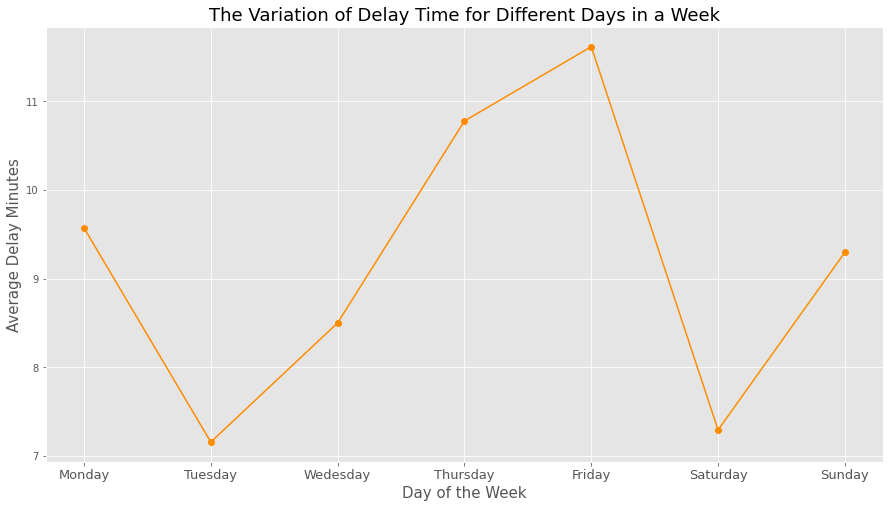

In [38]:
# Display the variation of delay time for different days in a week.
plt.figure(figsize = (15,8))
plt.style.use("ggplot")
plt.plot(best_day_of_week, color = "darkorange", marker = "o")
plt.title("The Variation of Delay Time for Different Days in a Week", fontsize = 18)
plt.xlabel("Day of the Week", fontsize = 15)
plt.ylabel("Average Delay Minutes", fontsize = 15)
plt.ticklabel_format(style = "plain", axis = "y")
days = [1,2,3,4,5,6,7]
days_name = ["Monday", "Tuesday", "Wedesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = plt.subplot()
ax.set_xticks(days)
ax.set_xticklabels(days_name, fontsize = 13)

plt.show()

Delays occurring on both Tuesday and Saturday are deemed satisfactory, with a minimal accumulation of delay minutes. The most opportune moment to circumvent delays is during Tuesday, as it boasts the least amount of delay minutes.# Group and calculate the sum of the given columns for each group.

In [39]:

best_day_of_month = df_Q1.groupby('Day')['DepDelay'].mean()
print(best_day_of_month)

Day
1      8.459455
2      9.636067
3      8.412426
4      7.044781
5      8.414408
6      7.526595
7      7.940194
8      7.751013
9      7.634642
10     8.626650
11     9.100357
12     8.599706
13    10.038541
14     9.526142
15    10.432849
16    10.630298
17     9.409945
18     9.133554
19     9.641388
20    10.750846
21    10.095183
22    12.030468
23     9.749998
24     8.897204
25     8.881677
26     9.116669
27     9.833831
28    11.010825
29     9.262673
30     9.082666
31     8.712905
Name: DepDelay, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

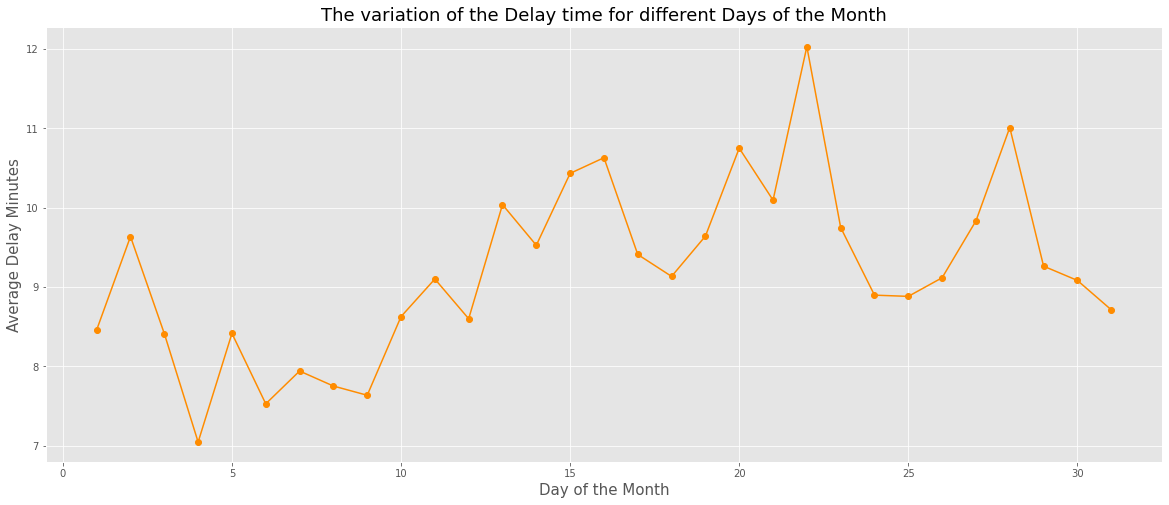

In [40]:
#Display the variation of delay time for different days of the month.
plt.figure(figsize = (20,8))
plt.style.use('ggplot')
plt.plot(best_day_of_month,color = 'darkorange',marker = 'o')
plt.title('The variation of the Delay time for different Days of the Month',fontsize = 18)
plt.xlabel("Day of the Month", fontsize = 15)
plt.ylabel('Average Delay Minutes',fontsize = 15)
plt.ticklabel_format(style = 'plain',axis = 'y')

plt.show

February lacks a 29–31-day interval in every leap year, and four months exclude the 31st day. However, there are seven months that have 31 days, which means that using the mean is a more precise method than using the sum to describe the data. The most opportune day of the month is the 4th, and the delay time before 15th is typically lower than after 15th of a month, making it an ideal time for traveling. Although there is no apparent pattern or trend, the average delay time during the initial fortnight of the month is generally lower than in the latter half.

#### best month of year

In [41]:
# Group and calculate the sum of the given columns for each group
best_month_of_year = df_Q1.groupby('Month')['DepDelay'].mean()
print(best_month_of_year)

Month
1      9.181050
2      8.248759
3      9.313211
4      6.438746
5      6.816704
6     11.673284
7     13.236721
8      9.857604
9      6.708695
10     8.426482
11     7.928189
12    12.368838
Name: DepDelay, dtype: float64


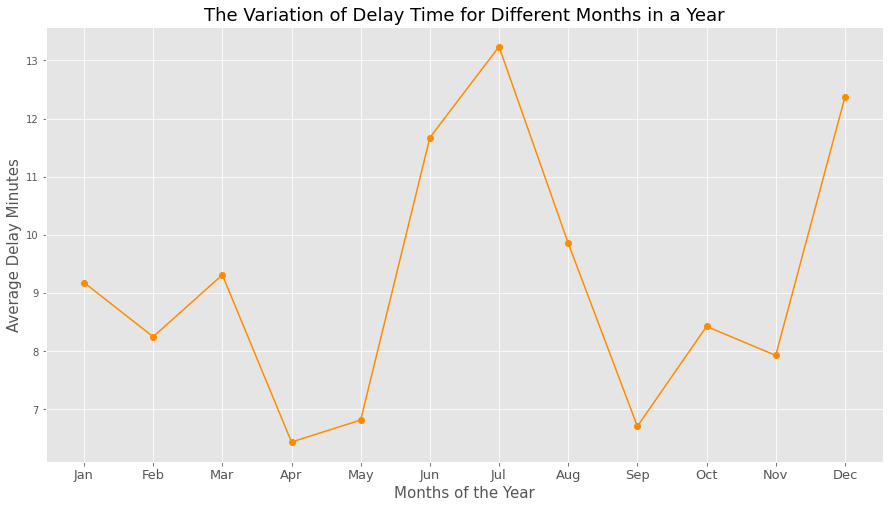

In [42]:
# Display the variation of delay time for different months in a year.
plt.figure(figsize = (15,8))
plt.style.use("ggplot")
plt.plot(best_month_of_year, color = "darkorange", marker = "o")
plt.title("The Variation of Delay Time for Different Months in a Year", fontsize = 18)
plt.xlabel("Months of the Year", fontsize = 15)
plt.ylabel("Average Delay Minutes", fontsize = 15)
plt.ticklabel_format(style = "plain", axis = "y")
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct", "Nov", "Dec"]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
ax = plt.subplot()
ax.set_xticks(months)
ax.set_xticklabels(month_names, fontsize = 13)

plt.show()

The mean delay minutes of April, May ,and September are lower than 7 mins. The best month of year is April.It also demonstrates the middle and end of the year have high average delay time.

## Question 2: Do older planes suffer more delays?


Correlation Analysis between Planes' Age and Delays

In [43]:
#Import complementary infomation
airports = pd.read_csv('E:/UOL_semester_2/programming_of_data_science/Individual_Assessment/2004_2006Datasource/Complementary infomation/airports.csv')
planes = pd.read_csv('E:/UOL_semester_2/programming_of_data_science/Individual_Assessment/2004_2006Datasource/Complementary infomation/plane-data.csv')

In [44]:
#Define df_Q2 by df_Question
df_Q2 = df_Question
raw_planes = planes
raw_airports = airports

## Clean Duplicate of complenmentary information

In [45]:
print("The number of duplicated rows is {0}.".format(raw_planes.duplicated().sum()))

The number of duplicated rows is 0.


In [46]:
print("The number of duplicated rows is {0}.".format(raw_airports.duplicated().sum()))

The number of duplicated rows is 0.


Duplicate cleaned

In [47]:
# Delete all rows with null values in the ArrDelay column.
df_Q2 = df_Q2.dropna(subset=['ArrDelay']).reset_index(drop=True)

In [48]:
# Create a variable for delays.Less than 0 mins is status '1' which means delay or '0' not delay
df_Q2['Arr_Delay'] = np.where(df_Q2['ArrDelay'] <= 15 , '0', '1')

In [49]:
# Merge the information about some individual planes data to the airlines data and create a new variable for plane age.
raw_planes = raw_planes.rename(columns={'tailnum':'TailNum', 'year':'ManufactureYear'})
df_planes = df_Q2[['Year', 'TailNum', 'Arr_Delay']]
df_planes = df_planes.merge(raw_planes, on='TailNum', how='left')
df_planes['ManufactureYear'] = df_planes['ManufactureYear'].replace('None', np.nan)
df_planes = df_planes.dropna(subset = ['ManufactureYear']).reset_index(drop=True)
df_planes['ManufactureYear'] = df_planes['ManufactureYear'].astype(np.int64)
df_planes['PlaneAge'] = df_planes['Year']-df_planes['ManufactureYear']
df_planes = df_planes.loc[(df_planes['ManufactureYear'] != 0) & (df_planes['PlaneAge'] >= 0)]
df_planes.head()

,Year,TailNum,Arr_Delay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,ManufactureYear,PlaneAge
0,2005,N935UA,0,Corporation,BOEING,06/29/1992,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992,13
1,2005,N941UA,0,Corporation,BOEING,10/07/1992,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992,13
2,2005,N342UA,0,Corporation,BOEING,11/28/1988,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,17
3,2005,N326UA,0,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,17
4,2005,N902UA,0,Corporation,BOEING,04/30/1993,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990,15


PlaneAge = Year - ManufactureYear

In [50]:
df_planes.isnull().sum()

Year               0
TailNum            0
Arr_Delay          0
type               0
manufacturer       0
issue_date         0
model              0
status             0
aircraft_type      0
engine_type        0
ManufactureYear    0
PlaneAge           0
dtype: int64

The null value will not affect the result ! Replace all the nan value to 0 in order to avoid affecting the technical operation and creating bug.

In [51]:
# Merge the information about some individual planes data to the airlines data and create a new variable for plane age.

df_planes = raw_planes.rename(columns={'tailnum':'TailNum', 'year':'ManufactureYear'}).rename(columns={'tailnum':'TailNum', 'year':'Manufacture_Year'})
df_planes = df_Q2[['Year', 'TailNum', 'Arr_Delay']]
df_planes = df_planes.merge(raw_planes, on='TailNum', how='left')
df_planes['ManufactureYear'] = df_planes['ManufactureYear'].replace('None', np.nan)
df_planes = df_planes.dropna(subset = ['ManufactureYear']).reset_index(drop=True)
df_planes['ManufactureYear'] = df_planes['ManufactureYear'].astype(np.int64)
df_planes['Plane_Age'] = df_planes['Year']-df_planes['ManufactureYear']
df_planes = df_planes.loc[(df_planes['ManufactureYear'] != 0) & (df_planes['Plane_Age'] >= 0)]
df_planes.head()

,Year,TailNum,Arr_Delay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,ManufactureYear,Plane_Age
0,2005,N935UA,0,Corporation,BOEING,06/29/1992,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992,13
1,2005,N941UA,0,Corporation,BOEING,10/07/1992,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992,13
2,2005,N342UA,0,Corporation,BOEING,11/28/1988,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,17
3,2005,N326UA,0,Corporation,BOEING,09/11/2007,737-322,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1988,17
4,2005,N902UA,0,Corporation,BOEING,04/30/1993,737-522,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990,15


In [52]:
# Pre-process the data
plt1 = df_planes.groupby('Plane_Age')['Arr_Delay'].value_counts(normalize=True)
plt1 = plt1.mul(100).rename('Percent').reset_index()
plt1 = plt1.loc[plt1['Arr_Delay'] == '1']
plt2 = df_planes.groupby(['Plane_Age','Arr_Delay']).size().unstack()
plt2['Difference'] = plt2['0']-plt2['1']
plt2['Total'] = plt2['0']+plt2['1']

In [53]:
#  Find the pairwise correlation of the plane age and delay percentage columns.
correlation = plt1['Plane_Age'].corr(plt1['Percent'])
print("The correlation coefficient between the plane age and its delay percentages is {0}.".format(round(correlation,3)))

The correlation coefficient between the plane age and its delay percentages is -0.296.


The correlation coefficient is close to -0.3 demonstrates there is negative weak linear correlation !

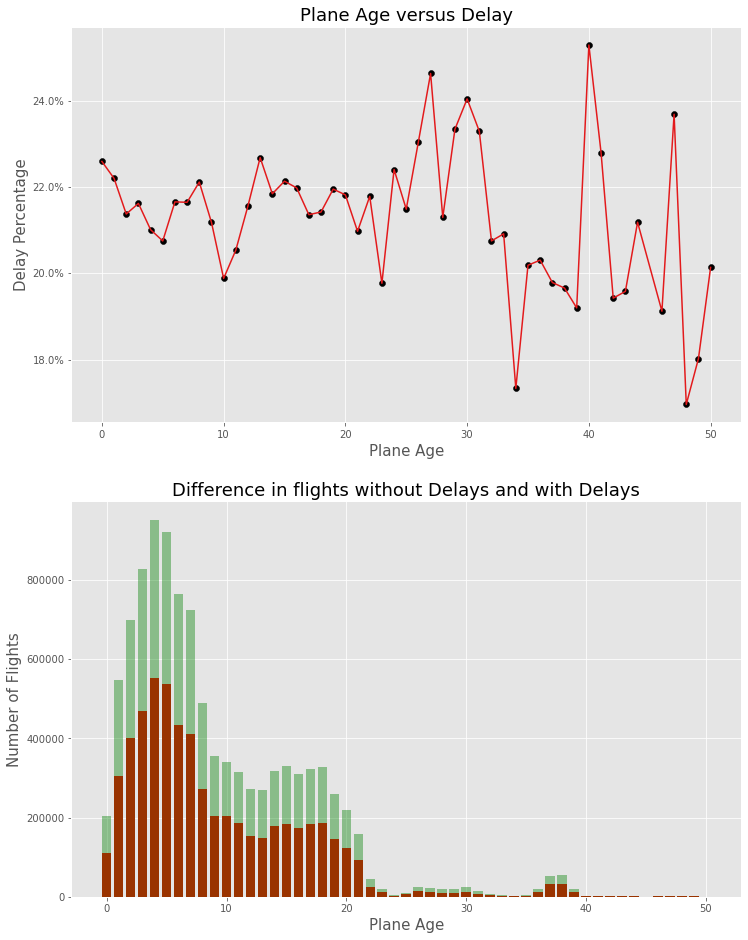

In [54]:
# Display graphs about the plane age and delays.
fig, ax = plt.subplots(2,1, figsize=(12, 16))
ax[0].scatter(plt1['Plane_Age'], plt1['Percent'], color="Black")
ax[0].plot(plt1['Plane_Age'], plt1['Percent'], color="#E31A1C")
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())
ax[0].set_xlabel("Plane Age", fontsize=15)
ax[0].set_ylabel("Delay Percentage", fontsize=15)
ax[0].axes.set_title('Plane Age versus Delay', fontsize=18)

def thousand_formatter(x, pos):
    formatter = '{:1.0f}K'.format(x*0.001)
    return formatter
ax[1].bar(plt2.index, plt2['Difference'], alpha = 1, width = 0.8, color = 'Red')
ax[1].bar(plt2.index, plt2['Total'], alpha = 0.4, width = 0.8, color = 'Green')
ax[1].set_ylabel('Number of Flights', fontsize=15)
ax[1].set_xlabel('Plane Age', fontsize=15)
ax[1].axes.set_title("Difference in flights without Delays and with Delays", fontsize=18)

plt.show()

The delay rate for aircraft aged between 10-25 years experiences minor fluctuations, and the overall delay rate stands at 21%. Conversely, for aircraft aged 25-30 years, the overall delay rate increases to 23%, and fluctuations become more pronounced. The fluctuation range is substantial for planes over 30 years old; nevertheless, the overall delay rate remains steady at around 20%-21%.

Additionally, the bar graph shows the total number of flights for each age (represented by the red bar) and the difference between the number of delayed and non-delayed flights (represented by the green bar). Clearly, aircraft between 0 and 10 years old perform better than older aircraft. Aircraft are between 10-20 years old. The age of aircraft is 10-20 years, and the average annual number of aircraft is 180,000. In terms of the number of aircraft, there is sufficient data to ensure the accuracy of the delay rate before the age of 22-year-old aircraft. However, the data for aircraft aged 22 and above is insufficient, and there is a certain chance, which leads to the accuracy of the data after the age of 22 aircraft decrease, making it difficult to draw any conclusive relationship between aircraft age and percentage delays. Based on the graph, it is reasonable to assume that older aircraft experience more frequent delays.

## Question 3: How does the number of people flying between different locations change over time?

Changes in the Number of Passengers on Different flight path


In [55]:
# Define df_Q3
df_Q3 = df_Question[['Year','Origin','Dest','UniqueCarrier']]
df_Q3

,Year,Origin,Dest,UniqueCarrier
0,2005,BOS,ORD,United Airlines
1,2005,BOS,ORD,United Airlines
2,2005,BOS,ORD,United Airlines
3,2005,BOS,ORD,United Airlines
4,2005,ORD,BOS,United Airlines
...,...,...,...,...
7141917,2006,ATL,EWR,Delta Airlines
7141918,2006,SEA,ATL,Delta Airlines
7141919,2006,ATL,MCO,Delta Airlines
7141920,2006,SLC,SJC,Delta Airlines


In [56]:
#  Merge and regroup the DataFrame to get the cities for flights origins and destinations.

df_Q3 = df_Q3.merge(airports, how='left', left_on='Origin', right_on='iata').rename(columns={'city': 'OriginCity'})
df_Q3 = df_Q3.merge(airports, how='left', left_on='Dest', right_on='iata').rename(columns={'city': 'DestCity'})
df_Q3 = df_Q3[['Year','OriginCity','DestCity','UniqueCarrier']]
df_Q3 = df_Q3.groupby(['Year','OriginCity', 'DestCity']).agg('count').reset_index().rename(columns={'UniqueCarrier': 'Frequency'})
df_Q3.head()

,Year,OriginCity,DestCity,Frequency
0,2005,Abilene,College Station,1
1,2005,Abilene,Dallas-Fort Worth,2415
2,2005,Abilene,Houston,331
3,2005,Abilene,San Angelo,2
4,2005,Adak,King Salmon,102


In [57]:
df_Y2005 = df_Q3[df_Q3['Year'] == 2005]
df_Y2006 = df_Q3[df_Q3['Year'] == 2006]

In [58]:
df_Y2005[:10]

,Year,OriginCity,DestCity,Frequency
0,2005,Abilene,College Station,1
1,2005,Abilene,Dallas-Fort Worth,2415
2,2005,Abilene,Houston,331
3,2005,Abilene,San Angelo,2
4,2005,Adak,King Salmon,102
5,2005,Aguadilla,New York,449
6,2005,Aguadilla,Newark,341
7,2005,Akron,Atlanta,3716
8,2005,Akron,Boston,726
9,2005,Akron,Chicago,579


In [59]:
# Obtain the top 10 air routes in 2005.
df_Y2005 = df_Y2005.sort_values(by='Frequency', ascending=False)[:10].reset_index(drop=True)
df_Y2005['Travel'] = df_Y2005['OriginCity'].map(str) + " to " + df_Y2005['DestCity']


In [215]:
# Find records in 2006 that match with the top 10 air routes in 2005.
df_Y2006['Travel'] = df_Y2006['OriginCity'].map(str) + " to " + df_Y2006['DestCity']
df_Y2006 = df_Y2006.loc[df_Y2006['Travel'].isin(df_Y2005['Travel']),]
df_Y2006[:10]

,Year,OriginCity,DestCity,Frequency,Travel
4570,2006,Arlington,New York,14542,Arlington to New York
4992,2006,Boston,New York,21172,Boston to New York
5365,2006,Chicago,Minneapolis,14112,Chicago to Minneapolis
5372,2006,Chicago,New York,14983,Chicago to New York
6956,2006,Los Angeles,San Diego,14554,Los Angeles to San Diego
7194,2006,Minneapolis,Chicago,13722,Minneapolis to Chicago
7407,2006,New York,Arlington,14542,New York to Arlington
7414,2006,New York,Boston,21189,New York to Boston
7422,2006,New York,Chicago,14980,New York to Chicago
8378,2006,San Diego,Los Angeles,14594,San Diego to Los Angeles


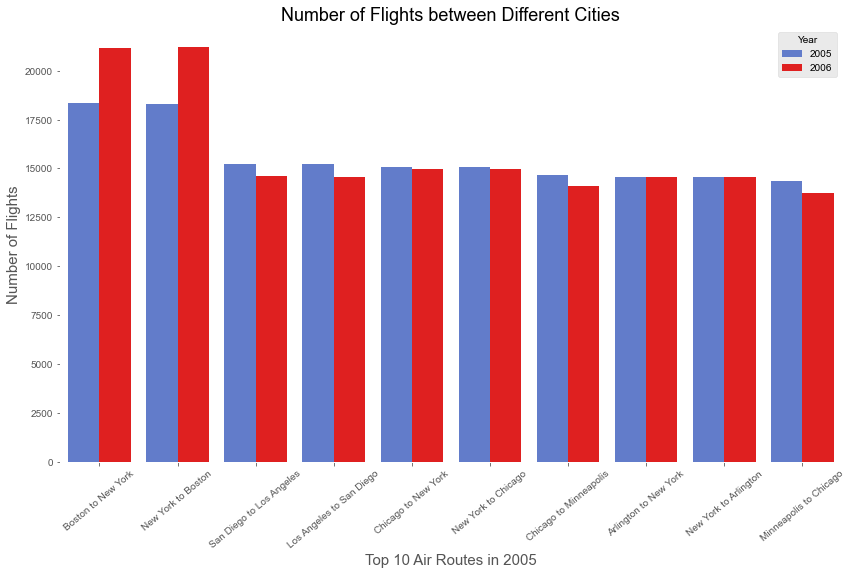

In [61]:
# Display a grouped bar chart to see the number of flights between different cities.
df_Q3F = pd.concat([df_Y2005, df_Y2006])
plt.subplots(figsize=(14,8))
ax = sns.barplot(data = df_Q3F, x='Travel', y='Frequency', hue='Year', palette=['#5173DB', 'RED', '#6A6A68'], alpha = 1)
ax.set_xlabel("Top 10 Air Routes in 2005", fontsize=15)
ax.set_ylabel("Number of Flights", fontsize=15)
ax.axes.set_title('Number of Flights between Different Cities', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)
sns.set(font_scale = 1.2, style='darkgrid')
ax.set_facecolor('white')

plt.show()

The histogram displays the leading 10 air travel routes in 2005, whereas the grouped bars illustrate the count of flights for the top 10 frequent air routes in 2005, and the changes in 2006. It is evident that the air travel route between Boston and New York had the maximum number of flights in both years. There was an increment in the number of flights between Boston and New York, as well as between Arlington and New York. However, there was a decrease in the number of flights between Chicago and Minneapolis, New York and Chicago, Los Angeles and San Diego, as well as Chicago and Minneapolis in 2006.

## Question 4: Can you detect cascading failures as delays in one airport create delays in others?

Cascading Failures Detection

In [62]:
# Regroup and Rank Airlines by delay time.
df_Q4 = df_Question
df_Q4.groupby("UniqueCarrier")["DepDelay"].sum().sort_values(ascending=False)

UniqueCarrier
Southwest Airlines             21647998
American Airlines              13084182
United Airlines                10444463
Envoy Airlines                  9995484
Delta Airlines                  9257776
Atlantic Southeast Airlines     8208165
SkyWest Airlines                7670199
United States Airways           7455457
Expressjet Airlines             6969871
Northwest Airlines              6721401
Continental Airlines            5716510
Florida Airlines                5522004
PSA Airlines                    5002328
YV                              4206546
Alaska Airlines                 3580054
JetBlue Airways                 2890779
America West Airlines           1299227
Indepedence Airlines             877554
Frontier Airlines                756935
Air Tazania Airlines             446971
AQ                                -3908
Hawaiian Airlines               -116865
Name: DepDelay, dtype: int32

In [63]:
# Drop unnecessary columns for the question.
df_Q4 = df_Q4.drop(["Cancelled","Diverted","DayOfWeek","ActualElapsedTime","CRSElapsedTime","CancellationCode","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","Distance","TaxiIn","TaxiOut","AirTime"], axis = 1)
df_Q4.head()

,Year,Month,Day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,Dest,DATE,24HoursTime
0,2005,1,28,1603,1605,1741,1759,United Airlines,541,N935UA,-18,-2,BOS,ORD,2005-01-28,16:00
1,2005,1,29,1559,1605,1736,1759,United Airlines,541,N941UA,-23,-6,BOS,ORD,2005-01-29,15:00
2,2005,1,30,1603,1610,1741,1805,United Airlines,541,N342UA,-24,-7,BOS,ORD,2005-01-30,16:00
3,2005,1,31,1556,1605,1726,1759,United Airlines,541,N326UA,-33,-9,BOS,ORD,2005-01-31,15:00
4,2005,1,2,1934,1900,2235,2232,United Airlines,542,N902UA,3,34,ORD,BOS,2005-01-02,19:00


In [64]:
# Subsetting United Airlines rows.
United_Airlines_delays = df_Q4.loc[(df_Q4["UniqueCarrier"] == "United Airlines") & (df_Q4["ArrDelay"] > 15)]

In [217]:
United_Airlines_delays[:35]

,Year,Month,Day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,Dest,DATE,24HoursTime
4,2005,1,2,1934,1900,2235,2232,United Airlines,542,N902UA,3,34,ORD,BOS,2005-01-02,19:00
5,2005,1,3,2042,1900,9,2232,United Airlines,542,N904UA,97,102,ORD,BOS,2005-01-03,20:00
6,2005,1,4,2046,1900,2357,2232,United Airlines,542,N942UA,85,106,ORD,BOS,2005-01-04,20:00
8,2005,1,6,2110,1900,8,2223,United Airlines,542,N920UA,105,130,ORD,BOS,2005-01-06,21:00
9,2005,1,7,1859,1900,2235,2223,United Airlines,542,N340UA,12,-1,ORD,BOS,2005-01-07,18:00
11,2005,1,10,1917,1900,2240,2223,United Airlines,542,N934UA,17,17,ORD,BOS,2005-01-10,19:00
12,2005,1,11,1935,1900,2259,2223,United Airlines,542,N336UA,36,35,ORD,BOS,2005-01-11,19:00
13,2005,1,12,2038,1900,18,2223,United Airlines,542,N920UA,115,98,ORD,BOS,2005-01-12,20:00
14,2005,1,13,2106,1900,9,2223,United Airlines,542,N923UA,106,126,ORD,BOS,2005-01-13,21:00
15,2005,1,14,1919,1900,2228,2223,United Airlines,542,N917UA,5,19,ORD,BOS,2005-01-14,19:00


A few examples will be provided to demonstrate how a delayed departure at the origin airport can result in subsequent delays at other destination airports.

Example 1

In [66]:
# Choose a random row of the history with Origin and TailNum
eg_1 = United_Airlines_delays.loc[(United_Airlines_delays["Origin"] == "ORD") & (United_Airlines_delays["TailNum"] == "N904UA")]
eg_1.iloc[1]

Year                            2005
Month                              1
Day                                9
DepTime                         1703
CRSDepTime                      1545
ArrTime                         1957
CRSArrTime                      1858
UniqueCarrier        United Airlines
FlightNum                        654
TailNum                       N904UA
ArrDelay                          59
DepDelay                          78
Origin                           ORD
Dest                             EWR
DATE             2005-01-09 00:00:00
24HoursTime                    17:00
Name: 3774, dtype: object

Observing the flight schedule for Tail Number N904UA, it was scheduled to depart from ORD at 15:45 but encountered a delay of 78 minutes and took off at 17:03. Its intended arrival time at STL was 18:58, but it arrived later than scheduled at 19:57, causing a delay of 59 minutes. The flight experienced a delay of 54 minutes after takeoff.

In [67]:
# Choose a random row.Take the dest of eg_1 to be the origin of 
eg_1_connect_flight = United_Airlines_delays.loc[(United_Airlines_delays["Origin"] == eg_1.iloc[1]['Dest']) & (United_Airlines_delays["TailNum"] == eg_1.iloc[1]['TailNum']) & (United_Airlines_delays["DATE"] == eg_1.iloc[1]['DATE'])]
eg_1_connect_flight.head()

,Year,Month,Day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,Dest,DATE,24HoursTime
3809,2005,1,9,2040,1945,2247,2124,United Airlines,655,N904UA,83,55,EWR,ORD,2005-01-09,20:00


Observing the same flight schedule for Tail Number N904UA, it was scheduled to depart from STL at 13:59 but encountered a delay of 9 minutes and took off at 14:08. Its intended arrival time at ORD was 15:15, but it arrived later than scheduled at 16:18, causing a delay of 63 minutes. The flight experienced a delay of 54 minutes after takeoff.

Example 2

In [68]:
# Choose a random row.
eg_2 = United_Airlines_delays.loc[(United_Airlines_delays["Origin"] == "DEN") & (United_Airlines_delays["TailNum"] == "N438UA")]
eg_2.iloc[3]

Year                            2005
Month                              1
Day                               30
DepTime                         1007
CRSDepTime                      1011
ArrTime                         1346
CRSArrTime                      1340
UniqueCarrier        United Airlines
FlightNum                       1430
TailNum                       N438UA
ArrDelay                           6
DepDelay                          -4
Origin                           DEN
Dest                             MSY
DATE             2005-01-30 00:00:00
24HoursTime                    10:00
Name: 19277, dtype: object

Observing the flight schedule for Tail Number N904UA, it was scheduled to depart from DEN at 18:40 but encountered a delay of 50 minutes and took off at 19:30. Its intended arrival time at MSY was 22:09, but it arrived later than scheduled at 22:47, causing a delay of 38 minutes. The flight experienced a delay of -12 minutes after takeoff.

In [69]:
# Find information about the connected flights.
eg_2_connect_flight = United_Airlines_delays.loc[(United_Airlines_delays["Origin"] == eg_2.iloc[3]['Dest']) & (United_Airlines_delays["TailNum"] == eg_2.iloc[3]['TailNum']) & (United_Airlines_delays["DATE"] == eg_2.iloc[3]['DATE'])]
eg_2_connect_flight.head()

,Year,Month,Day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,Dest,DATE,24HoursTime
19246,2005,1,30,1432,1430,1622,1619,United Airlines,1429,N438UA,3,2,MSY,DEN,2005-01-30,14:00


Observing the same flight schedule for Tail Number N438UA, it was scheduled to depart from MSY at 14:30 but encountered a delay of 2 minutes and took off at 14:32. Its intended arrival time at DEN was 16:19	, but it arrived later than scheduled at 16:22, causing a delay of 3 minutes. The flight experienced a delay of 5 minutes after takeoff.

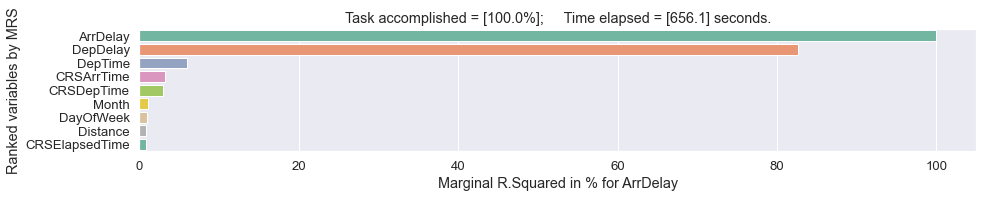

In [164]:
PF_Q4 = 'E:/UOL_semester_2/programming_of_data_science/Individual_Assessment/2004_2006Datasource/2006.csv'                                                                                                                                                                                                                                                                                                                                                                                                                                               
mp=cb.pump(PF_Q4)
A_list=['DepTime','CRSDepTime','CRSArrTime','CRSElapsedTime','Distance','UniqueCarrier','Month','ManufactureYear','DayOfWeek','Day','DepDelay','24HoursTime']
MD=cb.model(mp).mrs('ArrDelay',A_list,niter=100)

Hence, it is crucial to consider variables such as actual departure time, scheduled departure time, scheduled arrival time, distance, day of the month, scheduled elapsed time, and month. These factors are significant in analyzing the data and obtaining accurate results.

### Question 5: Use the available variables to construct a model that predicts delays.

### Flight Arrival Delay Prediction

In [71]:
# Import Machine Learning related libraries.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [72]:
df_Q5 = df_Question
df_Q5.head()

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DATE,24HoursTime
0,2005,1,28,5,1603,1605,1741,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-28,16:00
1,2005,1,29,6,1559,1605,1736,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-29,15:00
2,2005,1,30,7,1603,1610,1741,1805,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-30,16:00
3,2005,1,31,1,1556,1605,1726,1759,United Airlines,541,...,0,0,0,0,0,0,0,0,2005-01-31,15:00
4,2005,1,2,7,1934,1900,2235,2232,United Airlines,542,...,0,0,0,0,0,0,0,0,2005-01-02,19:00


Data Preprocessing

In [73]:
# Take a sample of 100000 records from the airlines DataFrame and reset the index of the DataFrame.
df_Q5 = df_Q5.sample(n=100000).reset_index()
df_Q5.head()

,index,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DATE,24HoursTime
0,1078792,2005,2,21,1,900,850,1328,1158,Continental Airlines,...,0,0,0,0,10,80,0,0,2005-02-21,09:00
1,1075765,2005,2,28,1,1236,1215,1351,1335,JetBlue Airways,...,0,0,0,0,0,5,0,11,2005-02-28,12:00
2,2992676,2006,6,18,7,2140,2140,2335,2345,Southwest Airlines,...,0,0,0,0,0,0,0,0,2006-06-18,21:00
3,4516324,2006,8,15,2,956,1000,1145,1151,Envoy Airlines,...,0,0,0,0,0,0,0,0,2006-08-15,09:00
4,1893235,2006,4,10,1,2058,2110,2311,2340,SkyWest Airlines,...,0,0,0,0,0,0,0,0,2006-04-10,20:00


In [74]:
#Create variable Arr_Delay, Less than or equal to 0 is 0, greater than or equal to 0 is 1
df_Q5['Arr_Delay'] = np.where(df_Q5['ArrDelay']<=15, '0', '1')

In the aviation industry, the "15-minute rule" stipulates that a flight is considered "on time" if it arrives within a few minutes of the scheduled arrival time. If the flight is delayed for more than 15 minutes, it is considered "delayed". According to real world situation, a reasonable tolerance rule can enhance the analysis and comprehension of the airline on-time performance.

In [199]:
# Select the independent variable and dependent variable.
all_features = ['CRSDepTime', 'DepTime', 'CRSArrTime','CRSElapsedTime','Distance','UniqueCarrier','DepDelay']
numerical_features = ['CRSDepTime', 'DepTime', 'CRSArrTime','CRSElapsedTime','Distance','DepDelay']
X = df_Q5[all_features].copy()
y = df_Q5['Arr_Delay'].copy()

In [200]:
# Apply SimpleImputer and StandardScaler into a pipeline.
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer()),('scaler', StandardScaler())])
categorical_features = ['UniqueCarrier']

# Apply SimpleImputer and OneHotEncoder into another pipeline.
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer()),('onehot', OneHotEncoder(handle_unknown='ignore'))])
data_transformer = ColumnTransformer(transformers=[('numerical', numerical_transformer, numerical_features),('categorical', categorical_transformer, categorical_features)])

# Split the dataset into a training set and a testing set. 70% data will be used for model training and 30% data will be used for model testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=1)

# Set the parameters.
param_grid = {'data_transformer__numerical__imputer__strategy': ['mean', 'median'],'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']}

Logistic Regression Model

In [201]:
# Create pipeline.
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),('pipe_lr', LogisticRegression(max_iter=10000, penalty = 'none'))])
# Tune the pipeline.
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
# Fit the model with data.
grid_lr.fit(X_train, y_train);

Penalised Logistic Regression Model

In [202]:
# Create pipeline.
pipe_plr = Pipeline(steps=[('data_transformer', data_transformer),('pipe_plr', LogisticRegression(penalty='l1', max_iter=10000, tol=0.01, solver='saga'))])
# Tune the pipeline.
grid_plr = GridSearchCV(pipe_plr, param_grid=param_grid)
# Fit the model with data.
grid_plr.fit(X_train, y_train);

Gradient Boosting Model

In [203]:
# Create pipeline.
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer),('pipe_gdb',GradientBoostingClassifier(random_state=0))])
# Tune the pipeline.
grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_grid)
# Fit the model with data.
grid_gdb.fit(X_train, y_train);

Decision Tree Model

In [204]:
# Create pipeline.
pipe_tree = Pipeline(steps=[('data_transformer', data_transformer),('pipe_tree', DecisionTreeClassifier(random_state=0))])
# Tune the pipeline.
grid_tree = GridSearchCV(pipe_tree, param_grid=param_grid)
# Fit the model with data.
grid_tree.fit(X_train, y_train);

Random Forest Model

In [205]:
# Create pipeline.
pipe_rf = Pipeline(steps=[('data_transformer', data_transformer),('pipe_rf', RandomForestClassifier(random_state=0))])
# Tune the pipeline.
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid)
# Fit the model with data.
grid_rf.fit(X_train, y_train);


Compare the Machine Learning Pipelines

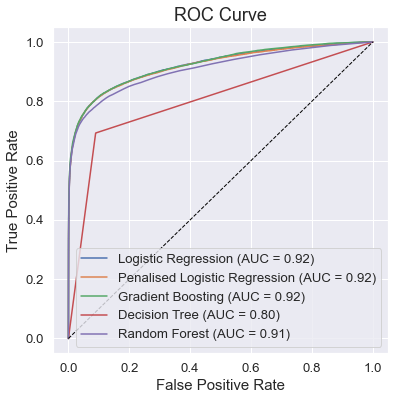

In [206]:
# Compare the machine learning pipelines by overlaying their Receiver Operating Characteristic (ROC) curves.
plt.subplots(figsize=(6,6))
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Logistic Regression')
plot_roc_curve(grid_plr, X_test, y_test, ax=ax, name='Penalised Logistic Regression')
plot_roc_curve(grid_gdb, X_test, y_test, ax=ax, name='Gradient Boosting')
plot_roc_curve(grid_tree, X_test, y_test, ax=ax, name='Decision Tree')
plot_roc_curve(grid_rf, X_test, y_test, ax=ax, name='Random Forest')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.axes.set_title('ROC Curve', fontsize=18)
plt.show()

The graph shows that the random forest model and the gradient boosting model have very close outermost ROC curves. They have high optimal threshold and equal AUC.

In [207]:
# Obtain the accuracy of the Gradient Boosting Model.
y_pred=grid_gdb.predict(X_test)
print("Gradient Boosting Model Accuracy Rate:",metrics.accuracy_score(y_test, y_pred))

Gradient Boosting Model Accuracy Rate: 0.9190857142857143


In [208]:
# Obtain the accuracy of the Logistic Regression model.
y_pred=grid_lr.predict(X_test)
print("Logistic Regression model Accuracy Rate:",metrics.accuracy_score(y_test, y_pred))

Logistic Regression model Accuracy Rate: 0.9189714285714286


In [209]:
# Obtain the accuracy of the random forest model.
y_pred=grid_rf.predict(X_test)
print("Random Forest Model Accuracy Rate:",metrics.accuracy_score(y_test, y_pred))

Random Forest Model Accuracy Rate: 0.9167142857142857


In [214]:
# Obtain the accuracy of the Penalised Logistic Regression Model.
y_pred=grid_plr.predict(X_test)
print("Penalised Logistic Regression Model Accuracy Rate:",metrics.accuracy_score(y_test, y_pred))

Penalised Logistic Regression Model Accuracy Rate: 0.9187571428571428


In [211]:
# Obtain the model results.
y_predict_rf = grid_rf.predict(X_test)
MSE= mean_squared_error(y_test, y_predict_rf)
MAE= mean_absolute_error(y_test, y_predict_rf)

print('Mean Squared Error of the Model:', MSE)
print('Mean Absolute Error of the Model:', MAE)


Mean Squared Error of the Model: 0.08328571428571428
Mean Absolute Error of the Model: 0.08328571428571428


In [212]:
n_samples = 100000
n_features = 6

In [213]:
r2= r2_score(y_test, y_predict_rf)
adj_r2 = 1 - ((1 - r2) * (n_samples - 1)) / (n_samples - n_features - 1)
print('R-squared of the Model:', r2)
print('adjusted R-squared of the Model:', adj_r2)

R-squared of the Model: 0.48899274533606374
adjusted R-squared of the Model: 0.4889620827544032


The Gradient Boosting Model could achieve an accuracy rate of around 91.9%, which is considered as very good accuracy. The gradient boosting model,Logistic Regression model and Penalised Logistic Regression Model could achieve accuracy rates of around 91.7%, which is lower than the Gradient Boosting Model. Thus, we should choose the Gradient Boosting Model  to predict the delays. The Mean Squared Error of the Gradient Boosting Model is 0.083 and the R-squared of the model is 0.489 which means 48.9% data can be interpreted through Gradient Boosting Model .